In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
from statsmodels.stats.weightstats import ztest as ztest
import scikit_posthocs as sph

## Names and Palette ##

In [33]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-07-04


'2023-07-04'

In [34]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
EBconc = '[EB] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'


In [35]:
#Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']
Type_order = ['None',  
    'WT', 
    'R76S', 
    'P191R'
             ]
              #P191ag1','P191ag2']
category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [59]:
black = '#000000'
grey = '#777777'
lightgrey = '#C5C5C5'
darkgrey = '#2A2A2A'
blue = '#23459C'
cyan = '#0089CF'
cyan2 = '#1A54B5'
green = '#79BA1A'
purple = '#AB4A9C'
purple2 = '#58089C'
lily = '#CB81EA'
magenta = '#74155C'
red = '#e60000'
orange = '#FF8341'
darkorange = '#FF5B00'
burntorange = '#973F0F'
lightorange = '#FFAC83'
seafm = '#00E528'
pink='#e468b8'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink2 = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey, '#69CCFF'
            , '#E468B8', '#FF8341'
          ]

parameters = [GrowthRate,TimeToNucleate,Lifetime, ShrinkageRate]

[<Color #ab4a9c>, <Color #cd54ae>, <Color #e468b8>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Open data if already saved ##

In [18]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data

,Rep,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
0,1,2023-04-24,Brandi,1,8,0,0,7.169,10.625667,0.674687,0.360812,7.383,NaN,NaN,False,None
1,1,2023-04-24,Brandi,1,8,0,0,6.634,10.040000,0.660757,8.811146,6.634,0.251000,26.430279,False,None
2,1,2023-04-24,Brandi,1,8,0,0,10.272,16.733333,0.613865,2.536146,10.272,0.334667,30.693227,False,None
3,1,2023-04-24,Brandi,1,8,0,0,5.029,9.287000,0.541510,11.655812,5.564,0.167333,33.250996,True,None
4,1,2023-04-24,Brandi,1,8,0,0,4.708,6.860667,0.686231,0.611812,4.387,NaN,NaN,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,6,2023-05-16,Brandi,3,8,60,0,6.206,9.287000,0.668246,0.386958,6.206,0.836667,7.417530,False,WT
1315,6,2023-05-16,Brandi,3,8,60,0,8.239,9.370667,0.879233,2.060292,8.774,1.087667,8.066810,True,WT
1316,6,2023-05-16,Brandi,3,8,60,0,13.696,16.147667,0.848172,1.892958,14.552,1.757000,8.282299,True,WT
1317,6,2023-05-16,Brandi,3,8,60,0,14.338,18.155667,0.789726,0.470625,14.552,1.673333,8.696414,False,WT


In [19]:
data[Type] = data[Type].astype(category_Type)
data = data.sort_values(by=[Type, 'Rep'])

In [20]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/Mutant aggregation/Data_Sheets/Plots')

In [85]:
df = data.groupby([Type,'Rep']).mean().dropna().reset_index()
df.to_csv(path/(date+'_RepsMean.csv'), encoding='utf-8', index=True)
df

,DCX Type,Rep,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues
0,None,1,1.0,8.0,0.0,0.0,4.922457,8.059174,0.619193,3.156852,4.957667,0.144238,43.601969,0.025641
1,None,2,2.0,8.0,0.0,0.0,3.254583,7.857694,0.433031,7.406243,3.169875,0.121096,26.991193,0.000000
2,None,3,1.0,8.0,0.0,0.0,3.207512,7.676255,0.431407,4.124961,3.278016,0.107864,41.764385,0.046512
3,None,4,1.0,8.0,0.0,0.0,6.875994,8.686578,0.795359,2.432576,6.897353,0.218131,40.879417,0.069767
4,None,5,1.0,8.0,0.0,0.0,4.541725,7.902250,0.581588,3.024002,4.605331,0.126635,39.729840,0.066667
5,WT,1,3.0,8.0,60.0,0.0,8.729219,11.691332,0.758012,1.134303,8.691967,1.066595,8.616252,0.222222
6,WT,2,4.0,8.0,60.0,0.0,8.651953,11.020469,0.782368,1.703837,8.488109,0.981776,9.595212,0.187500
7,WT,3,5.0,8.0,60.0,0.0,4.724963,8.733984,0.558062,3.304323,4.770634,1.059098,4.634993,0.073171
8,WT,4,3.0,8.0,60.0,0.0,11.274882,12.506392,0.905631,0.725618,11.242458,0.914502,12.445741,0.127273
9,WT,5,2.0,8.0,60.0,0.0,9.607247,10.634322,0.921493,1.864228,9.212454,0.591643,21.035762,0.103448


In [82]:
dfmeanstd = data.groupby([Type,EBconc]).aggregate(func=['mean','std','count']).dropna()
dfmeanstd.to_csv(path/(date+'_meanstd.csv'), encoding='utf-8', index=True)

dfmeanstd


C:\Users\Brandi\AppData\Local\Temp\ipykernel_12384\3904676325.py:1: FutureWarning: ['Date', 'Investigator'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfmeanstd = data.groupby([Type,EBconc]).aggregate(func=['mean','std','count']).dropna()


Rep                        Ch                  \
                           mean       std count      mean       std count   
DCX Type [EB] $(n M)$                                                       
None     0             3.653199  1.374575   297  1.080808  0.273000   297   
WT       0             3.950000  1.823527   300  3.283333  0.819733   300   
R76S     0             2.434783  1.041752   230  1.365217  0.774376   230   
P191R    0             4.798780  2.480506   492  2.079268  0.863268   492   

                      [Tubulin] $(\mu M)$            [DCX] $(n M)$  ...  \
                                     mean  std count          mean  ...   
DCX Type [EB] $(n M)$                                               ...   
None     0                            8.0  0.0   297           0.0  ...   
WT       0                            8.0  0.0   300          60.0  ...   
R76S     0                            8.0  0.0   230          60.0  ...   
P191R    0                            8.0  0.0   492          60.0  ...   

                      Shrink Length $(\mu m)$ Shrink Lifetime $(min)$  \
                                        count                    mean   
DCX Type [EB] $(n M)$                                                   
None     0                                297                0.154317   
WT       0                                300                0.906062   
R76S     0                                230                0.236392   
P191R    0                                492                0.199087   

                                      Shrink Rate $(\mu m / min)$             \
                            std count                        mean        std   
DCX Type [EB] $(n M)$                                                          
None     0             0.122581   248                   39.889380  26.372548   
WT       0             0.530193   299                   10.193146   7.019187   
R76S     0             0.248114   210                   25.980511  23.183088   
P191R    0             0.179244   442                   34.524759  23.744580   

                              Rescues                  
                      count      mean       std count  
DCX Type [EB] $(n M)$                                  
None     0              248  0.053872  0.226146   297  
WT       0              299  0.126667  0.333155   300  
R76S     0              210  0.039130  0.194328   230  
P191R    0              442  0.058943  0.235758   492  

[4 rows x 36 columns]

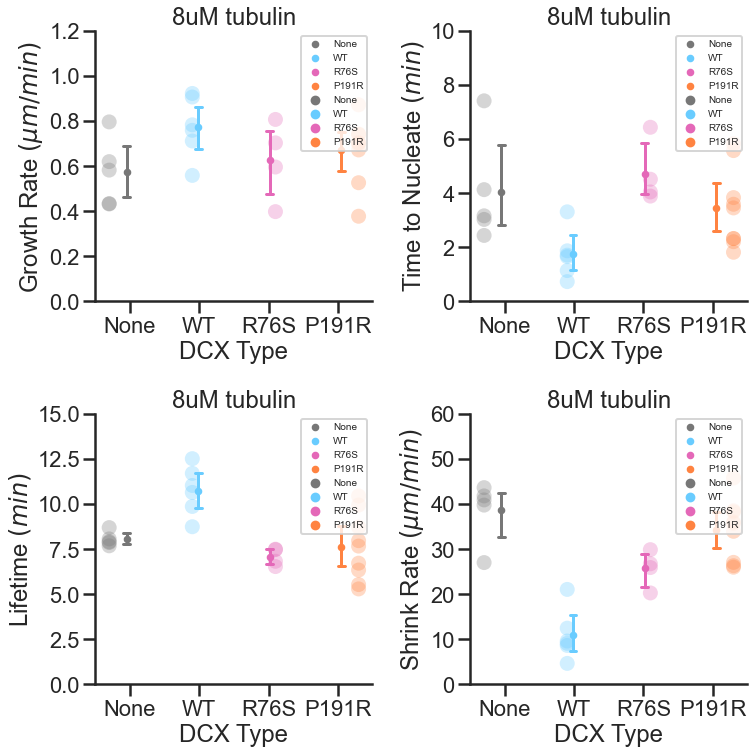

In [159]:
fig, axs = plt.subplots(2,2,figsize=(11,11))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=Type, y=parameters[c],
                         hue=Type, dodge=True,
                      err_style="bars",markers='.', join=False, capsize=0.1, scale =0.7,
                        data=df,err_kws={'capsize':10}, errwidth=3, ci=95 , palette=palette, alpha=0.5,ax=axs[i][j]).set(title='8uM tubulin')
        
        sns.stripplot(x=Type, y=parameters[c],
                         hue=Type, dodge=True, 
                      jitter=False, 
                      s=15, data=df, alpha=0.3,
                      #err_kws={'capsize':10},ci=95 , 
                      palette=palette,ax=axs[i][j]).set(title='8uM tubulin')
         
        axs[i][j].legend(loc='upper right', fontsize=10)
        c += 1
        
        
        
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})



axs[0][0].set_ylim(0,1.2)
axs[1][0].set_ylim(0,15)
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,60)



plt.tight_layout()
plt.savefig(path/('tub8uM_-RepPopCTL'+Type+'.pdf'))
plt.savefig(path/('tub8uM_-RepPopCTL'+Type+'.svg'))

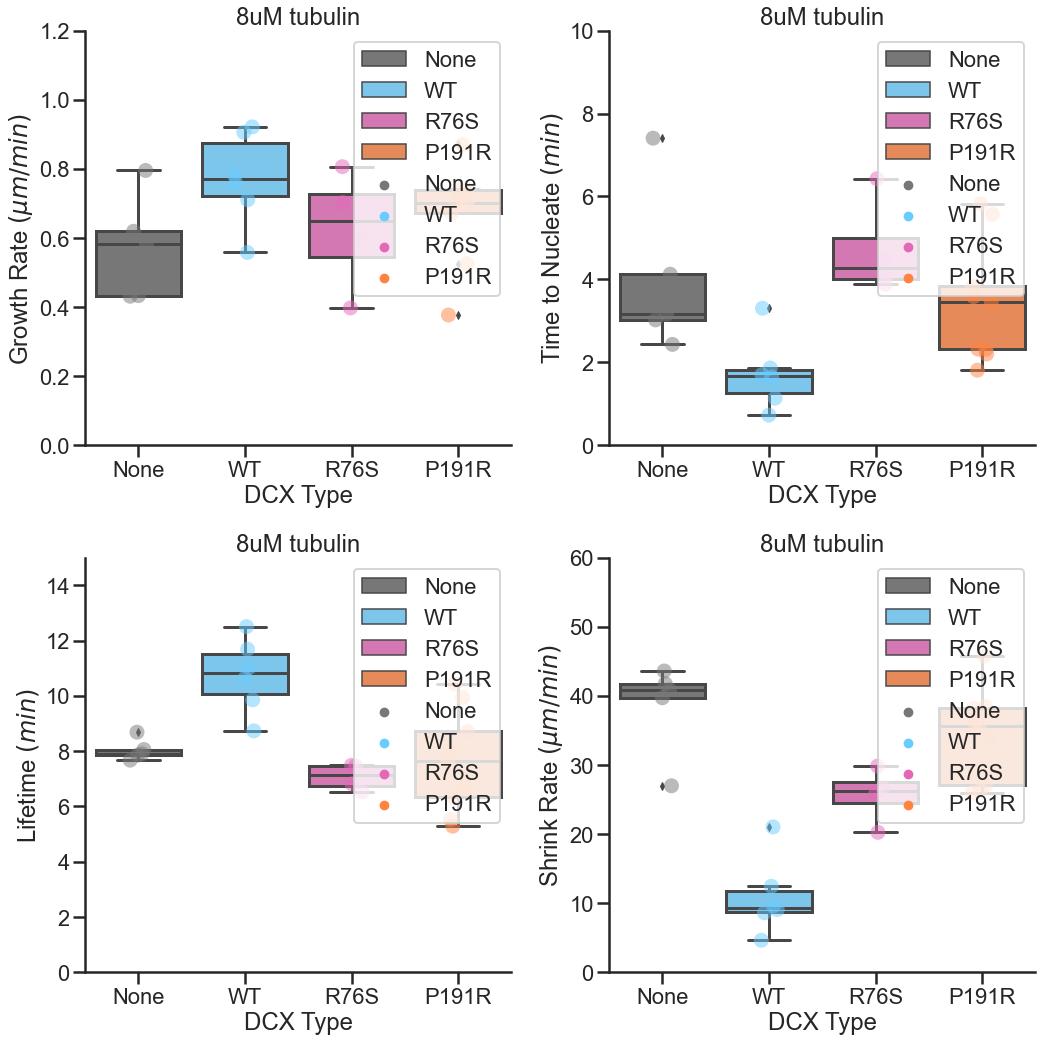

In [175]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.boxplot(x=Type, y=parameters[c],hue=Type, 
                    dodge = False, 
                        data=df, palette=palette,ax=axs[i][j]).set(title='8uM tubulin')
        sns.stripplot(x=Type, y=parameters[c], hue=Type, marker='o', dodge = False, palette = palette,data=df,alpha = 0.5, color="0.7", size=15,ax=axs[i][j])
        axs[i][j].legend(loc='upper right')
        c += 1
axs[0][0].set_ylim(0,1.2)
axs[1][0].set_ylim(0,15)
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,60)
    
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

# plt.savefig(path/('tub8uM_WTDCX-variable'+date+'.tiff'))
# plt.savefig(path/('tub8uM_WTDCX-variableBAR'+date+'.svg'))


# Seaborn plot #

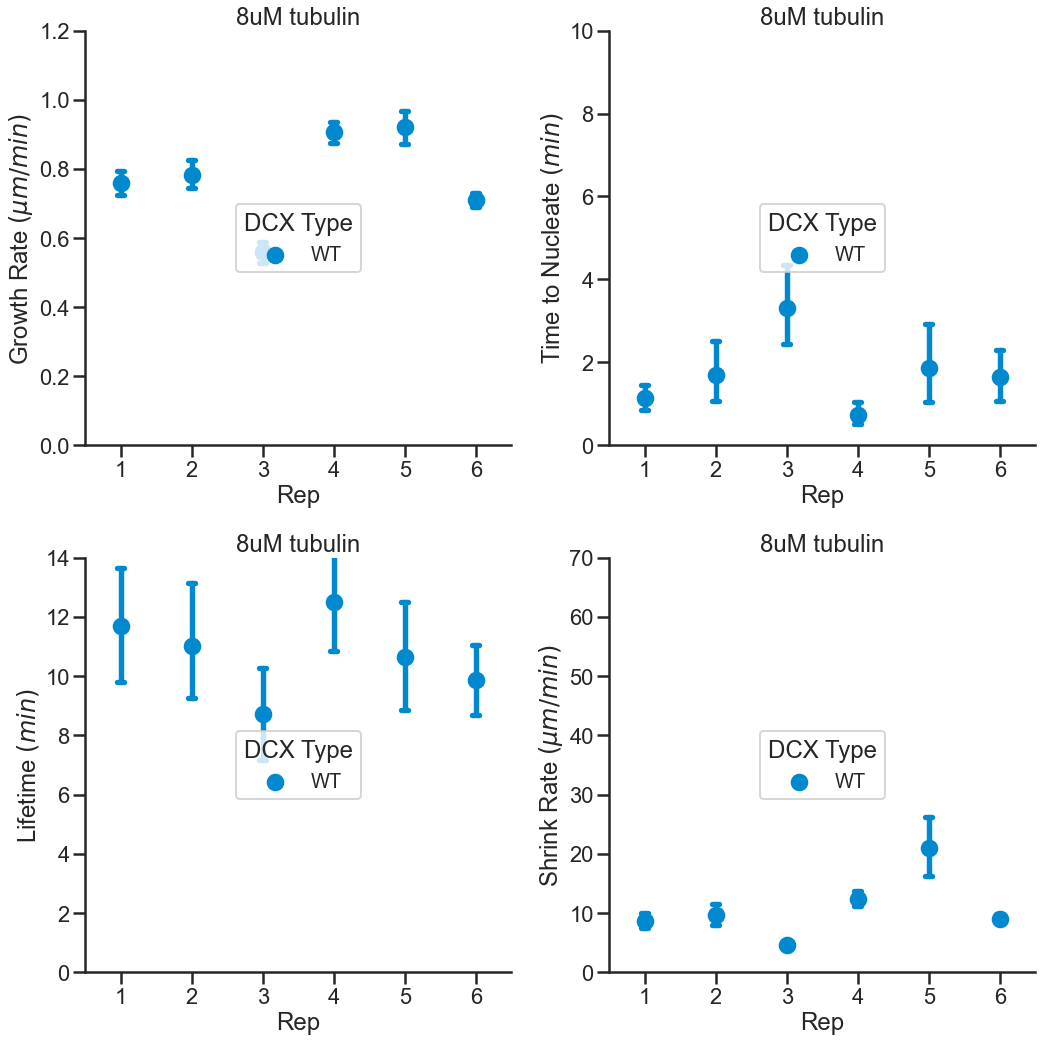

In [174]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Rep', y=parameters[c],
                         hue=Type, dodge=True,
                      err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[(data[tubulin]==8)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j]).set(title='8uM tubulin')
        axs[i][j].legend(loc='center', fontsize=20).set(title=Type)
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})



axs[0][0].set_ylim(0,1.2)
axs[1][0].set_ylim(0,14)
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,70)



plt.tight_layout()
plt.savefig(path/('tub8uM_DCX-REPS'+Type+'.pdf'))
plt.savefig(path/('tub8uM_DCX-REPS'+Type+'.svg'))

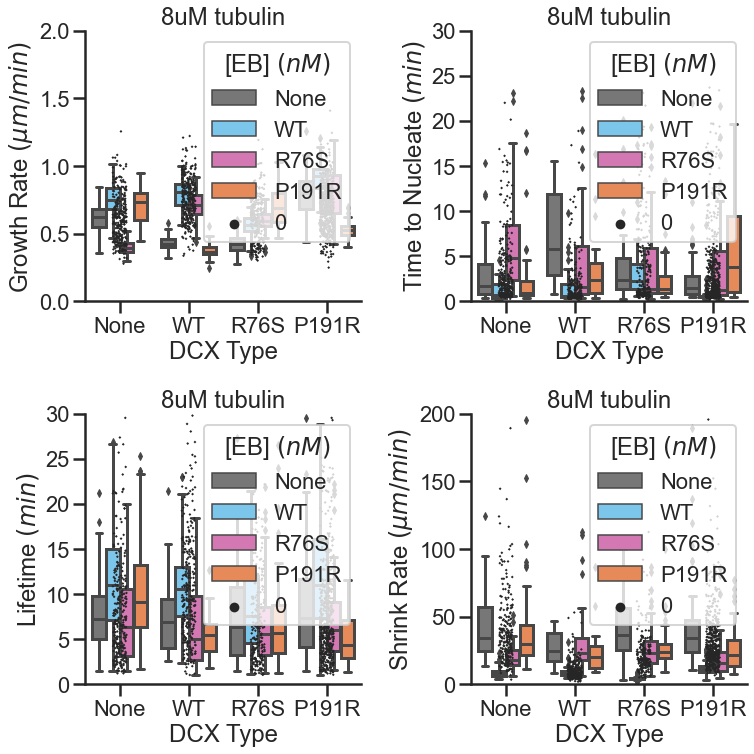

In [100]:
fig, axs = plt.subplots(2,2,figsize=(11,11))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.boxplot(x='Rep', y=parameters[c],hue=Type, 
                    dodge = True,
                        data=data[ (data[tubulin]==8)], palette=palette,ax=axs[i][j]).set(title='8uM tubulin')
        sns.stripplot(x=Type, y=parameters[c], hue=EBconc, marker='D', dodge = True, data=data[ (data[tubulin]==8)],alpha = 1, color="0.7", size=2,ax=axs[i][j])
        axs[i][j].legend(loc='upper right').set(title=EBconc)
        c += 1
axs[0][0].set_ylim(0,2)
axs[1][0].set_ylim(0,30)
axs[0][1].set_ylim(0,30)
axs[1][1].set_ylim(0,200)
    
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

# plt.savefig(path/('tub8uM_WTDCX-variable'+date+'.tiff'))
# plt.savefig(path/('tub8uM_WTDCX-variableBAR'+date+'.svg'))


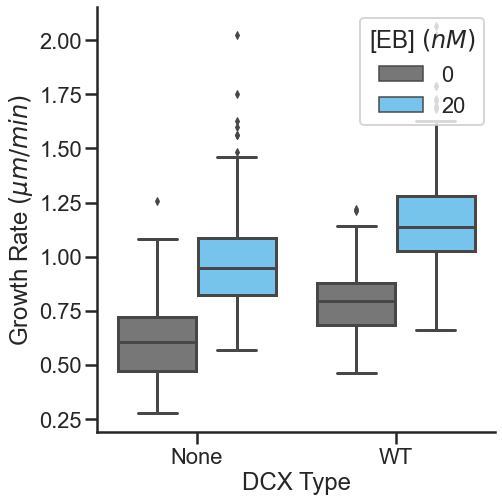

In [56]:
fig, axs = plt.subplots(1,1,figsize=(7.5,7.5))
sns.set_style("ticks")


sns.boxplot(x=Type, y=GrowthRate,hue=EBconc, 
                    dodge = True,
                        data=data[ (data[tubulin]==8)], palette=palette)
        # sns.stripplot(x=Type, y=parameters[c], hue=EBconc, marker='D', dodge = True, data=data[ (data[tubulin]==8)],alpha = 1, color="0.7", size=2,ax=axs[i][j])
axs.legend(loc='upper right').set(title=EBconc)
    
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

# plt.savefig(path/('tub8uM_WTDCX-GR'+date+'.tiff'))
# plt.savefig(path/('tub8uM_WTDCX-GR'+date+'.svg'))


## N

In [47]:
#Expts = df.groupby(['Courses','Fee']).count()
reps = data.groupby([Type, EBconc, 'Ch']).count()
print(reps)

                          Date  Investigator  [Tubulin] $(\mu M)$  \
DCX Type [EB] $(n M)$ Ch                                            
None     0            1    273           273                  273   
                      2     24            24                   24   
                      3      0             0                    0   
                      4      0             0                    0   
         20           1      0             0                    0   
                      2    136           136                  136   
                      3     85            85                   85   
                      4     93            93                   93   
WT       0            1      0             0                    0   
                      2     29            29                   29   
                      3    198           198                  198   
                      4     32            32                   32   
         20           1     50    

## Statistical Tests

In [110]:
#Select data for stats comparison

def stats_hist(data, tubconc, dcxtype, dcxconc, ebconc, parameter) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[EBconc]==ebconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    return selectdata[parameter]

In [124]:
#Mann-whitney (non-parametrical testing)

x3 = stats_hist(data, 8, 'None', 0, 0, ShrinkageRate).dropna()
x4 = stats_hist(data, 8, 'None', 0, 20, ShrinkageRate).dropna()
sp.stats.mannwhitneyu(x3,x4)


MannwhitneyuResult(statistic=33891.5, pvalue=0.0035140609906812482)

In [108]:
#Kruskal-Wallis (non-parametrical, requires post-hoc Dunn's test)
from scipy import stats
x4 = stats_hist(data, 8, 'WT', 60, 0, Lifetime)
x5 = stats_hist(data, 8, 'R76S', 60, 0, Lifetime)
y4 = stats_hist(data, 8, 'WT', 60, 20, Lifetime)
# y5 = stats_hist(data, 8, 'R76S', 60, 20, Lifetime)

stats.kruskal(x4,x5,y4)

KruskalResult(statistic=nan, pvalue=nan)

In [72]:
# Perform Dunn's Test
df = [x4,x5, y4]
dunn_results = sph.posthoc_dunn(df, p_adjust = 'bonferroni')
print(dunn_results)

              1             2             3
1  1.000000e+00  2.495068e-05  1.166502e-59
2  2.495068e-05  1.000000e+00  5.098276e-12
3  1.166502e-59  5.098276e-12  1.000000e+00


In [15]:
x1 = stats_hist(data, 8, 'WT', 0, 0, TimeToNucleate)
x2 = stats_hist(data, 8, 'WT', 60, 0, TimeToNucleate)
ztest(x1, x2)

C:\Users\Brandi\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:1543: RuntimeWarning: Mean of empty slice.
  x1_mean = x1.mean(0)
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Brandi\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:1544: RuntimeWarning: Degrees of freedom <= 0 for slice
  x1_var = x1.var(0)
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

In [114]:
data[ShrinkageRate].dropna()

0      189.274900
1      150.908366
2      144.513944
3      143.235060
4      136.840638
          ...    
872      3.911884
873      3.836653
876      3.197211
877      2.717629
878      2.344622
Name: Shrink Rate $(\mu m / min)$, Length: 879, dtype: float64

# Fitting Data #

In [145]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [146]:
def make_hist(data, parameter, tubconc, dcxtype, dcxconc,ebconc) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
    
    if parameter == GrowthRate :
        maxbin = 1.5
        binsize = 0.05
#     elif parameter == ShrinkageRate :
#         maxbin = 15
#         binsize = 0.1
    else:
        maxbin = 30
        binsize = 1
        
    n, bins, patches = plt.hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), density=True);
    plt.clf()
       
    return n, bins

In [147]:
def equation_fit(data, parameter):
    
    if (parameter ==  GrowthRate) | (parameter == ShrinkageRate) :
        equation = gaussian
    elif parameter == TimeToNucleate :
        equation = exponential
    elif parameter == Lifetime :
        equation = gamma
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():

                    n, bins =  make_hist(data, parameter, tubconc, dcxtype, dcxconc,ebconc)      

                    if np.isnan(np.sum(n)) == True:
                        continue

                    if equation == gamma :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
                    else :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

                    variance = np.diagonal(var_matrix) #Refer [3]
                    SE = np.sqrt(variance) #Refer [4]

                #======Making a data frame========
                    results0 = pd.DataFrame(columns=[] , index=[])
                    
                    for k in np.arange(0,len(coeff)):
                        
                        r0 = pd.DataFrame([[coeff[k],SE[k]],],columns=['Fit', 'SE'])
                        r0['Coefficient'] = k
                        results0 = pd.concat([results0, r0], sort=False)
                        
#                     for k in np.arange(0,len(coeff)):
#                         header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
#                         r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
#                         results0 = pd.concat([results0, r0], axis=1, sort=False)

                    results0[tubulin] = tubconc
                    results0[Type] = dcxtype
                    results0[DCXconc] = dcxconc
                    results0[EBconc] = ebconc
                    results0['Parameter'] = parameter

                    results = pd.concat([results, results0], sort=False)

    return results

In [148]:
newmydir = path/(date+'_fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/DCX_EB_Dynamics/IRM/8uM-tub/Plots/old/Plots/2023-06-30_fitdata')

In [162]:
GrowthRateFit = equation_fit(data, GrowthRate);
TimeToNucleateFit = equation_fit(data, TimeToNucleate);
LifetimeFit = equation_fit(data, Lifetime);
ShrinkageRateFit = equation_fit(data, ShrinkageRate);

C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Brandi\AppData\Local\Temp\ipykernel_21676\2256907929.py:8: RuntimeWarning: divide by zero encountered in power
  return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))
C:\Users\Brandi\AppData\Local\Temp\ipykernel_21676\2256907929.py:8: RuntimeWarning: divide by zero encountered in power
  return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Brandi\AppData\Local\Temp\ipykernel_21676\2256907929.py:8: Runti

<Figure size 432x288 with 0 Axes>

In [163]:
GrowthRateFit['Moment'] = GrowthRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')
TimeToNucleateFit['Moment'] = 'Mean'
ShrinkageRateFit['Moment'] = ShrinkageRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')

In [164]:
GrowthRateFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,0.558523,0.012726,0,8,None,0,0,Growth Rate $(\mu m / min)$,Mean
0,0.171823,0.010391,1,8,None,0,0,Growth Rate $(\mu m / min)$,Std
0,0.902572,0.013810,0,8,None,0,20,Growth Rate $(\mu m / min)$,Mean
0,0.180768,0.011278,1,8,None,0,20,Growth Rate $(\mu m / min)$,Std
0,0.763519,0.005563,0,8,WT,60,0,Growth Rate $(\mu m / min)$,Mean
0,0.144488,0.004542,1,8,WT,60,0,Growth Rate $(\mu m / min)$,Std
0,1.102632,0.021880,0,8,WT,60,20,Growth Rate $(\mu m / min)$,Mean
0,0.173670,0.018058,1,8,WT,60,20,Growth Rate $(\mu m / min)$,Std


In [165]:
LifetimeCoeff0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['Fit'].values
LifetimeCoeff1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['Fit'].values
LifetimeSE0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['SE'].values
LifetimeSE1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = np.sqrt(np.square(LifetimeCoeff0*LifetimeSE1) + np.square(LifetimeCoeff1*LifetimeSE0))
LifetimeSE

array([0.74633123, 0.36263158, 1.69568885, 0.44795819])

In [166]:
LTmeandf = LifetimeFit[(LifetimeFit['Coefficient']==0)]
LTmeandf['Fit'] = LifetimeMean
LTmeandf['SE'] = LifetimeSE
LTmeandf['Coefficient'] = np.NaN
LTmeandf['Moment'] = 'Mean'
LTmeandf

C:\Users\Brandi\AppData\Local\Temp\ipykernel_21676\1969975474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LTmeandf['Fit'] = LifetimeMean
C:\Users\Brandi\AppData\Local\Temp\ipykernel_21676\1969975474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LTmeandf['SE'] = LifetimeSE
C:\Users\Brandi\AppData\Local\Temp\ipykernel_21676\1969975474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,7.444276,0.746331,NaN,8,None,0,0,Lifetime $(min)$,Mean
0,1.262164,0.362632,NaN,8,None,0,20,Lifetime $(min)$,Mean
0,10.971393,1.695689,NaN,8,WT,60,0,Lifetime $(min)$,Mean
0,1.198124,0.447958,NaN,8,WT,60,20,Lifetime $(min)$,Mean


In [167]:
ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LTmeandf,ShrinkageRateFit], axis=0, sort=False)
ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,0.558523,0.012726,0.0,8,None,0,0,Growth Rate $(\mu m / min)$,Mean
0,0.171823,0.010391,1.0,8,None,0,0,Growth Rate $(\mu m / min)$,Std
0,0.902572,0.013810,0.0,8,None,0,20,Growth Rate $(\mu m / min)$,Mean
0,0.180768,0.011278,1.0,8,None,0,20,Growth Rate $(\mu m / min)$,Std
0,0.763519,0.005563,0.0,8,WT,60,0,Growth Rate $(\mu m / min)$,Mean
0,0.144488,0.004542,1.0,8,WT,60,0,Growth Rate $(\mu m / min)$,Std
0,1.102632,0.021880,0.0,8,WT,60,20,Growth Rate $(\mu m / min)$,Mean
0,0.173670,0.018058,1.0,8,WT,60,20,Growth Rate $(\mu m / min)$,Std
0,3.324252,0.148151,0.0,8,None,0,0,Time to Nucleate $(min)$,Mean
0,4.809107,0.276805,0.0,8,None,0,20,Time to Nucleate $(min)$,Mean


#  Open saved fit parameters  #

In [128]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to t
# the selected file
ResultFit = pd.read_csv(askFitParam, encoding='utf-8')
ResultFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,0.558523,0.012726,0.0,8,None,0,0,Growth Rate $(\mu m / min)$,Mean
1,0.171823,0.010391,1.0,8,None,0,0,Growth Rate $(\mu m / min)$,Std
2,0.902572,0.013810,0.0,8,None,0,20,Growth Rate $(\mu m / min)$,Mean
3,0.180768,0.011278,1.0,8,None,0,20,Growth Rate $(\mu m / min)$,Std
4,0.763519,0.005563,0.0,8,WT,60,0,Growth Rate $(\mu m / min)$,Mean
5,0.144488,0.004542,1.0,8,WT,60,0,Growth Rate $(\mu m / min)$,Std
6,1.102632,0.021880,0.0,8,WT,60,20,Growth Rate $(\mu m / min)$,Mean
7,0.173670,0.018058,1.0,8,WT,60,20,Growth Rate $(\mu m / min)$,Std
8,3.324252,0.148151,0.0,8,None,0,0,Time to Nucleate $(min)$,Mean
9,4.809107,0.276805,0.0,8,None,0,20,Time to Nucleate $(min)$,Mean


#  PLOT DATA  #

In [129]:
plotLT = ResultFit[(ResultFit['Parameter']==Lifetime) & (ResultFit['Moment']=='Mean')]
plotLT

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
20,7.444276,0.746331,NaN,8,None,0,0,Lifetime $(min)$,Mean
21,1.262164,0.362632,NaN,8,None,0,20,Lifetime $(min)$,Mean
22,10.971393,1.695689,NaN,8,WT,60,0,Lifetime $(min)$,Mean
23,1.198124,0.447958,NaN,8,WT,60,20,Lifetime $(min)$,Mean


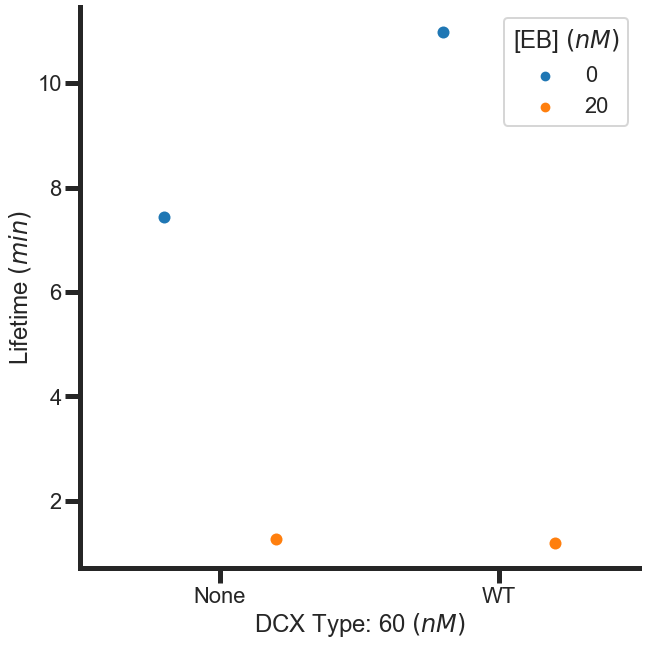

In [73]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

#ax = sns.boxplot(x= taxol, y='Expansion %', data=finalData, whis=np.inf, palette='Blues',linewidth=3)
ax = sns.swarmplot(x=Type, y='Fit',hue=EBconc, data=plotLT,dodge=True, size=12)

# ax.axhline(y = nogales2018, color = lightorange ,linestyle="--", linewidth=5.5, label='GDP'r'$\rightarrow$''GMPCPP \n Zhang (2018)')
# #plt.xlim(0.1,10)

# ax.set_ylim(-0.5,4)
# ax.legend( loc = 'lower right')
# #ax.legend('')
ax.set_ylabel(Lifetime)
ax.set_xlabel('DCX Type: 60 ' r'$(n M)$')

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


#plt.savefig(path/('expansion_'+date_today+'.svg'))

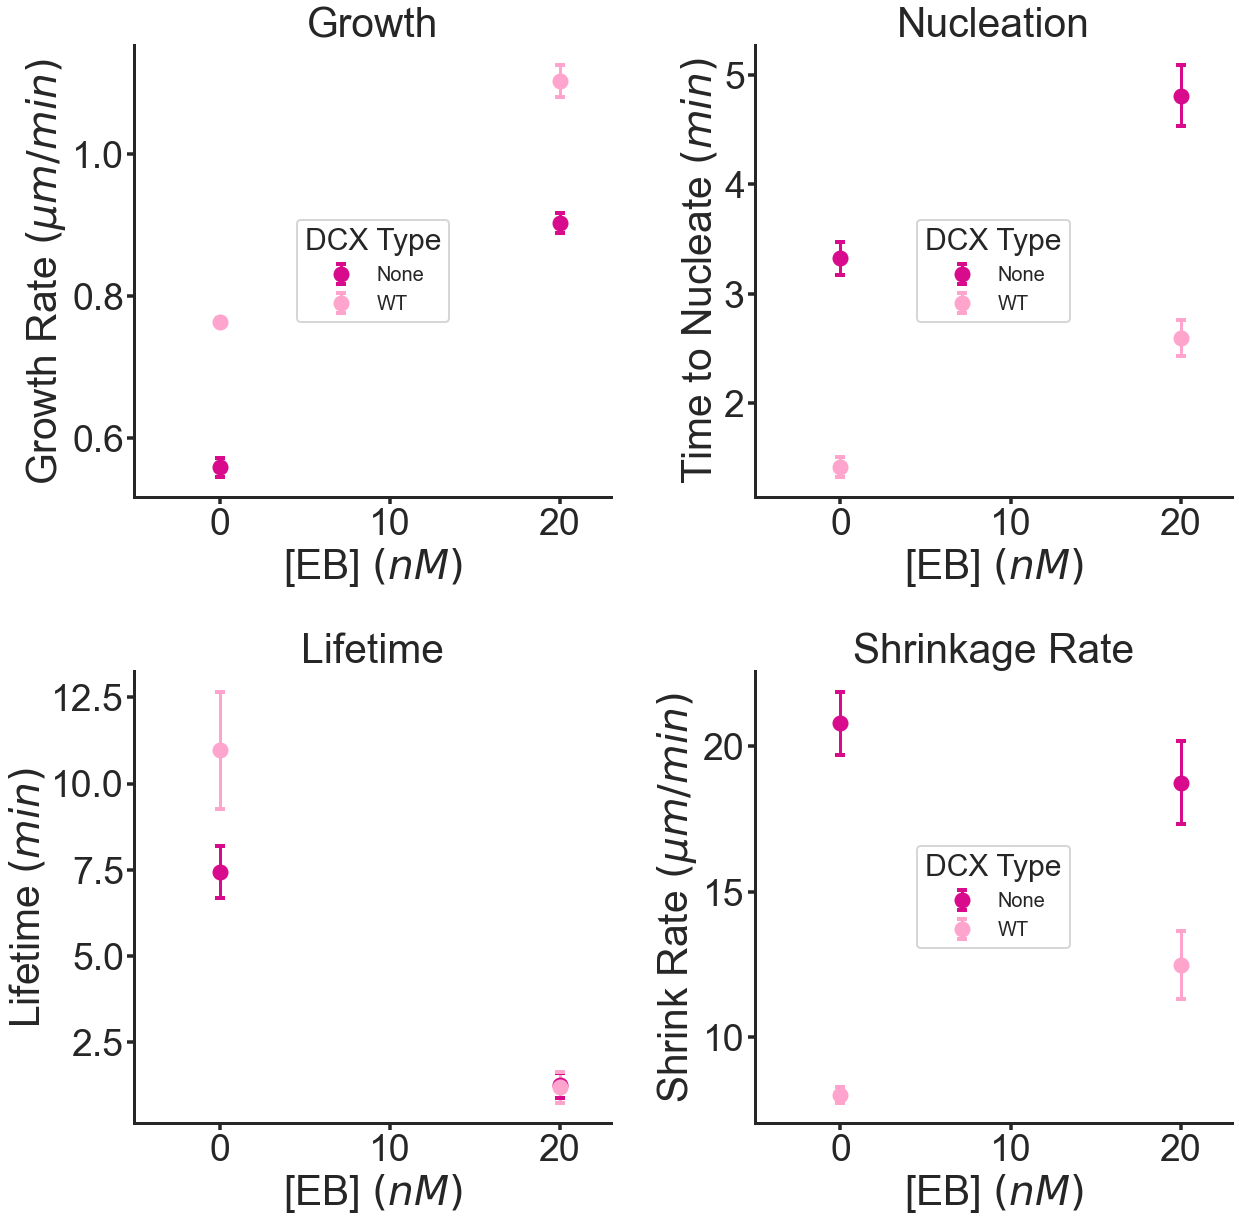

In [74]:
scattersize = 12
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shrinkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(18,18))

count = 0
for dcxtype in ResultFit[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')]
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[EBconc].values
            y = parameterMeanDF['Fit'].values
            
            yerr = parameterMeanDF['SE'].values
            
            ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                                          markeredgewidth=4,  alpha = 1 ,color=palette[count])

            c += 1

    count += 1

# ax[0][0].set_ylim(0,1)
# ax[1][0].set_ylim(0,18)
# ax[0][1].set_ylim(0,10)
# ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,23)
        ax[i][j].set_xlabel(EBconc)
        #ax[i][j].set_xticks(np.arange(0, 23, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        ax[i][1].legend((Type_order),loc='center', title='DCX Type', title_fontsize=30, fontsize=20)
        ax[i][j].set_title(titles[count])
       
        
        count += 1

ax[0][0].legend((Type_order),loc='center',title='DCX Type', title_fontsize=30, fontsize=20)
plt.tight_layout()

plt.savefig(path/('tub08uM_fit_'+date+'.png'))

# Histogram #

In [173]:
def plot_hist(data, tubconc, dcxtype, dcxconc,ebconc,color) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
    fig, ax = plt.subplots(2,2,figsize=(11,11))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 1.5
                binsize = 0.025
#             elif parameter == ShrinkageRate :
#                 maxbin = 25
#                 binsize = 0.5
            else:
                maxbin = 30
                binsize = 0.5

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,histtype='stepfilled',color = color,alpha = 0.4);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability Density')
            ax[i][j].set_xlim(0,maxbin)
            ax[0][0].set_xticks(np.arange(0, 1.6, 0.5))
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit.dropna(subset=['Coefficient'])
    selectcoeff=selectcoeff[(selectcoeff[tubulin]==tubconc) & (selectcoeff[Type]==dcxtype) 
                            & (selectcoeff[DCXconc]==dcxconc)& (selectcoeff[EBconc]==ebconc)]
    
    x = np.arange(0, 1.5 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[1]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
            
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    legnd = str(ebconc)+' nM'
    ax[0][1].legend(('Fit',legnd),loc='upper right',title='EB3')
    ax[1][0].legend(('Fit',legnd),loc='upper right',title='EB3')
    
    ax[0][0].set_ylim(0,6)
    ax[1][0].set_ylim(0,0.25)
    ax[0][1].set_ylim(0,1)
    ax[1][1].set_ylim(0,0.6)
    
    sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
    plt.tight_layout()
    plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'+EB-'+str(ebconc)+'.svg'))
    
    return print(n)

258


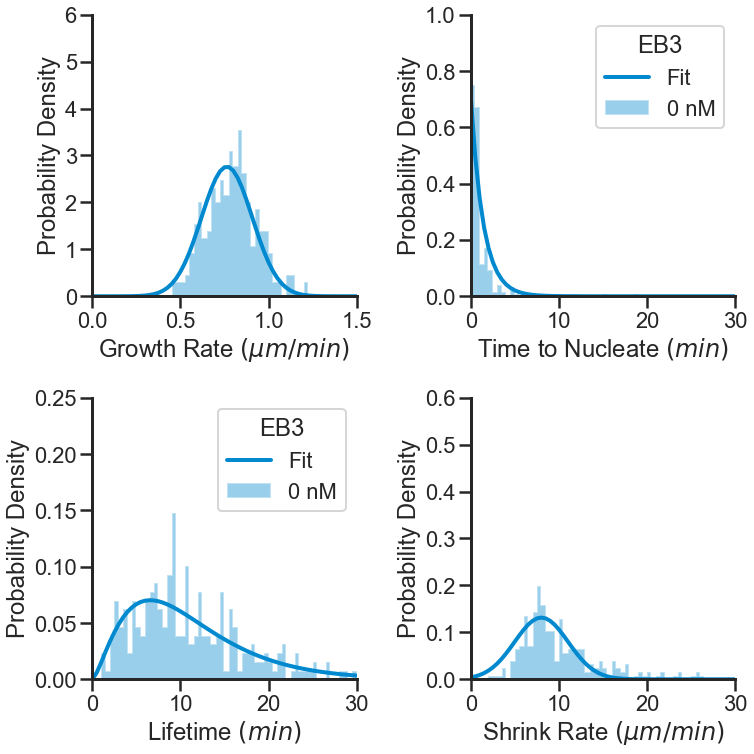

In [174]:
plot_hist(data, 8, 'WT', 60,0,cyan
        )

136


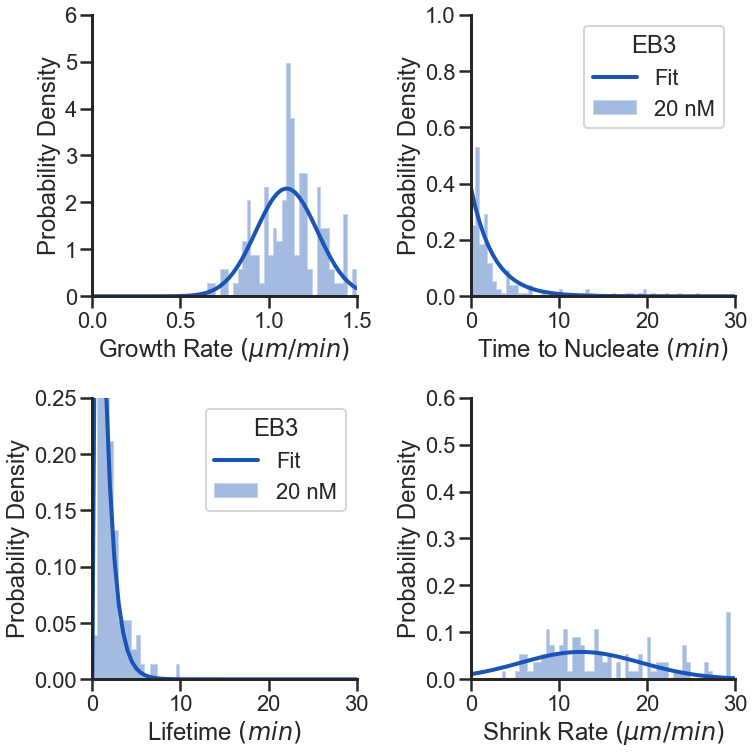

In [175]:
plot_hist(data, 8, 'WT', 60,20, cyan2)


## Reproducibility ##

In [67]:
tubconc =8
dcxtype = 'None'
dcxconc = 0
ebconc = 0
selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]

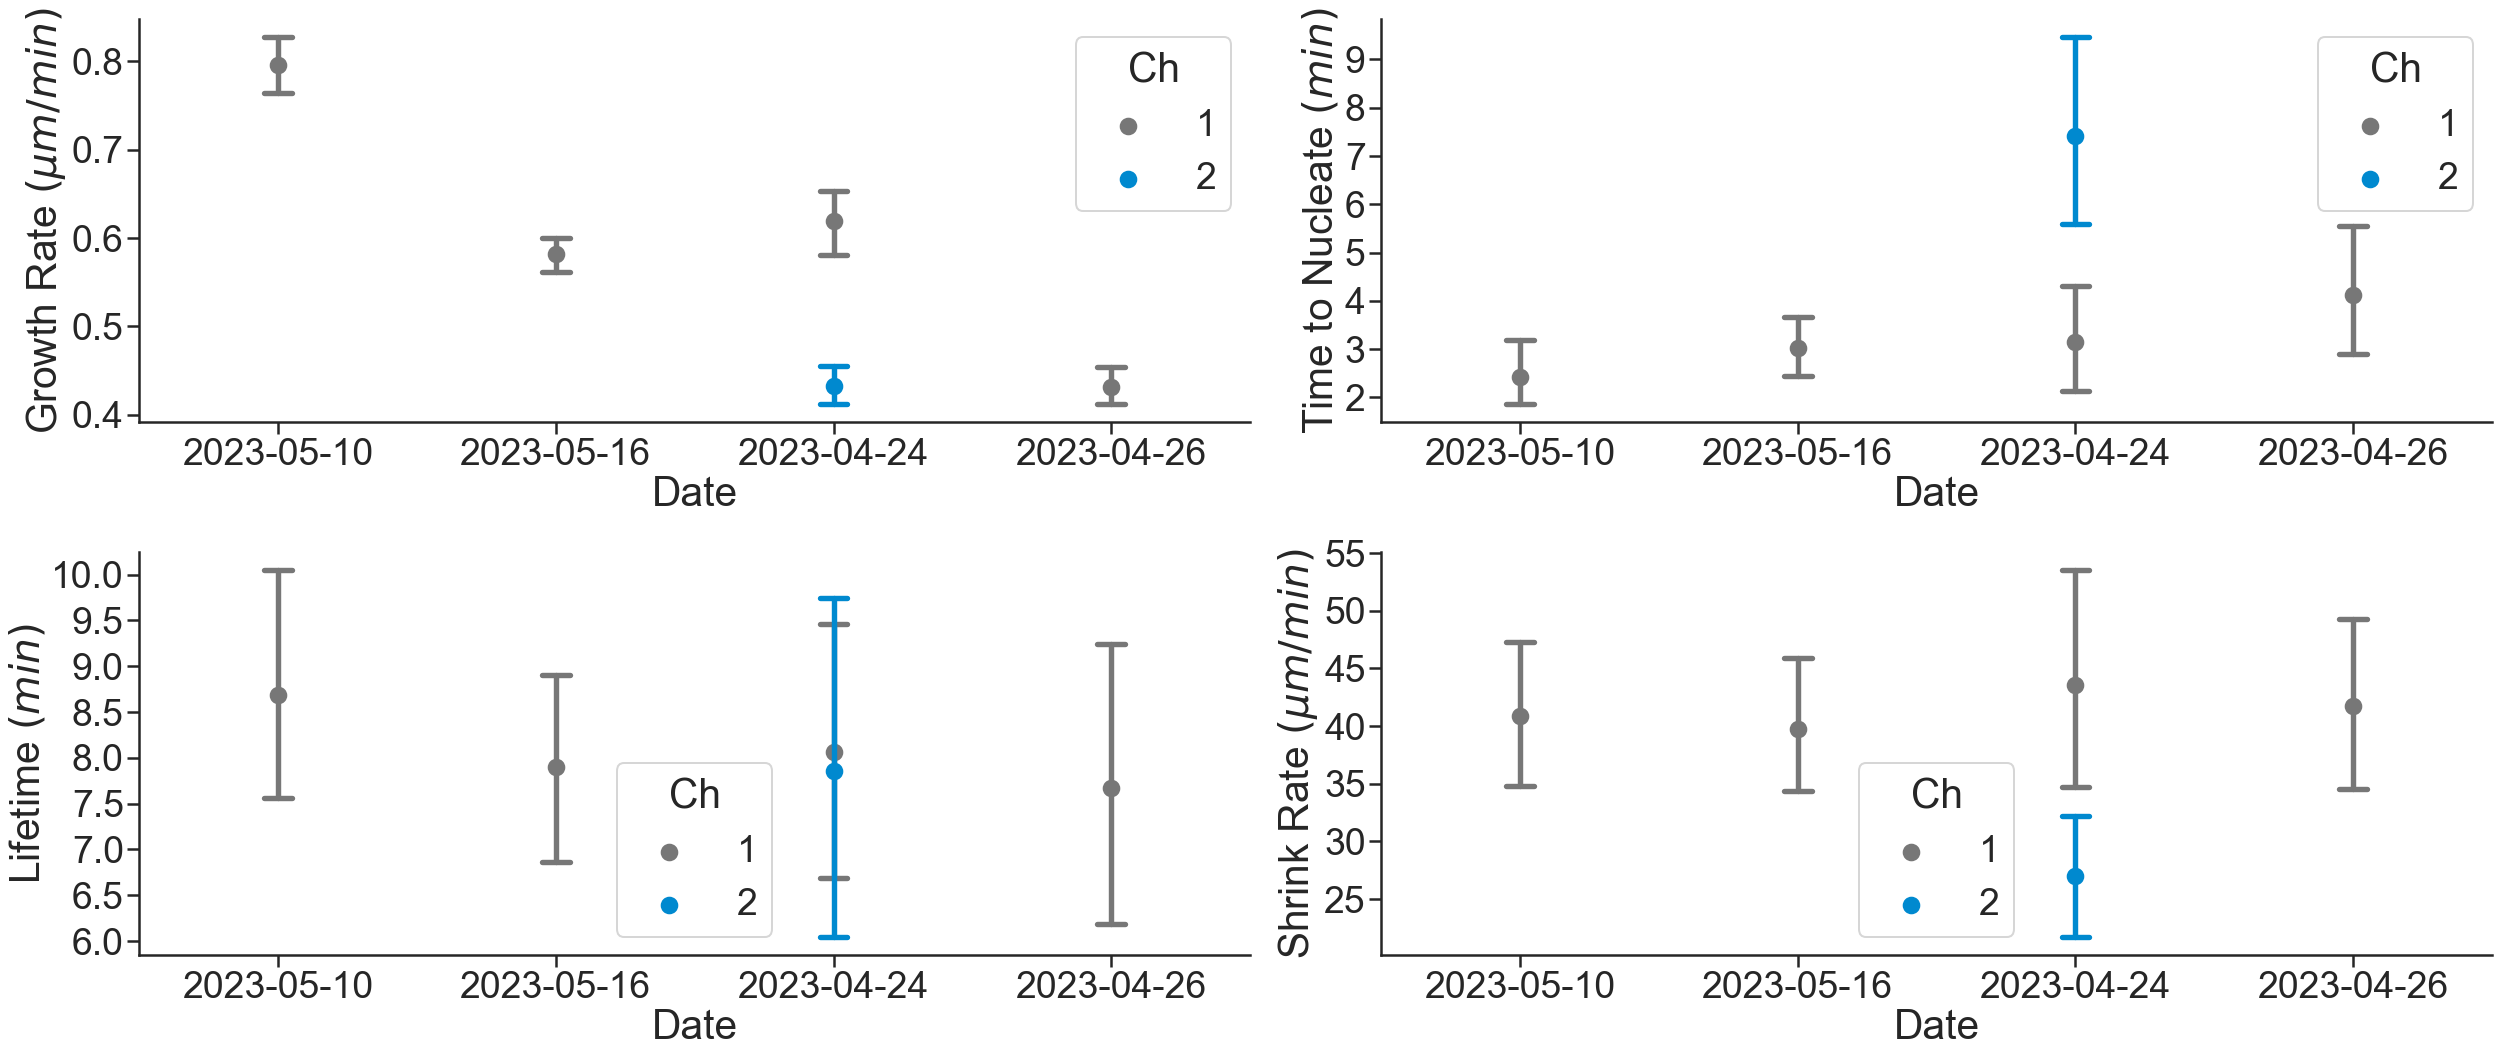

In [68]:
fig, axs = plt.subplots(2,2,figsize=(35,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Date', y=parameters[c],
                        hue='Ch', err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
# axs[0][0].set_ylim(0,1.5)
# axs[1][0].set_ylim(0,18)
# axs[0][1].set_ylim(0,10)
# axs[1][1].set_ylim(0,18)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


# Rescues #

In [176]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():

                    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
                    n =  selectdata[Type].count()

                    if n == 0:
                        continue
                        
                    rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                    rescue_values = 1-rv.loc[0][0]
                

                #======Making a data frame========
                    r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], EBconc:[ebconc], 'Normalized Rescue': [rescue_values],
                         'n': [n]}
                    results0 = pd.DataFrame(data=r0)
                    results = pd.concat([results, results0], sort=False)

    return results

In [177]:
rescues = rescue_count(data)
rescues

,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Normalized Rescue,n
0,8,None,0,0,0.053872,297
0,8,None,0,20,0.009554,314
0,8,WT,60,0,0.135135,259
0,8,WT,60,20,0.006623,151


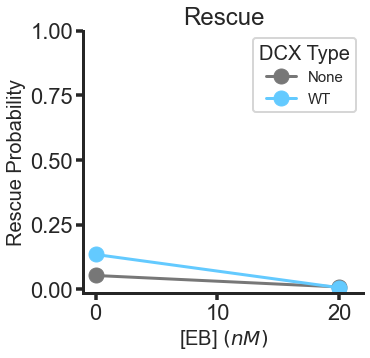

In [178]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(5.5,5.5))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==8) & (rescues[Type]== dcxtype)][EBconc]

    y = rescues[ (rescues[tubulin]==8) & (rescues[Type]== dcxtype)]['Normalized Rescue']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15)
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15, ls='--',alpha=0.8 )

    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,1)
ax.set_xlim(-1,22)
ax.set_xticks(np.arange(0, 30,10))
ax.set_xlabel( EBconc, fontsize=20)


#ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability', fontsize=20)

ax.legend((Type_order),loc='upper right',title='DCX Type', title_fontsize=20, fontsize=15)
# fig.suptitle('[Tubulin] ' r'$= 8 \mu M$', fontsize=25)
plt.tight_layout()
# plt.savefig(path.parents[0]/('Fit-Rescue_.jpg'))
plt.savefig(newmydir/('joint_graphsRescues_all.svg'))

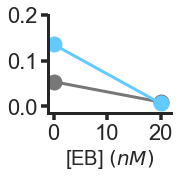

In [179]:
#rescale

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(3,3))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==8) & (rescues[Type]== dcxtype)][EBconc]

    y = rescues[ (rescues[tubulin]==8) & (rescues[Type]== dcxtype)]['Normalized Rescue']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15)
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15, ls='--',alpha=0.8 )

    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,0.20)
ax.set_xlim(-1,22)
ax.set_xticks(np.arange(0, 30,10))
ax.set_yticks(np.arange(0, 0.21,0.1))
ax.set_xlabel( EBconc, fontsize=20)


#ax.set_title('Rescue')
# ax.set_ylabel('Rescue Probability')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

# ax.set_title('Rescue')
# ax.set_ylabel('Rescue Probability', fontsize=20)

# ax.legend((Type_order),loc='upper right',title='DCX Type', title_fontsize=20, fontsize=15)
# fig.suptitle('[Tubulin] ' r'$= 8 \mu M$', fontsize=25)
plt.tight_layout()
# plt.savefig(path.parents[0]/('Fit-Rescue_.jpg'))
plt.savefig(newmydir/('joint_graphsRescues_inset.svg'))

# Lifetime Parameters #

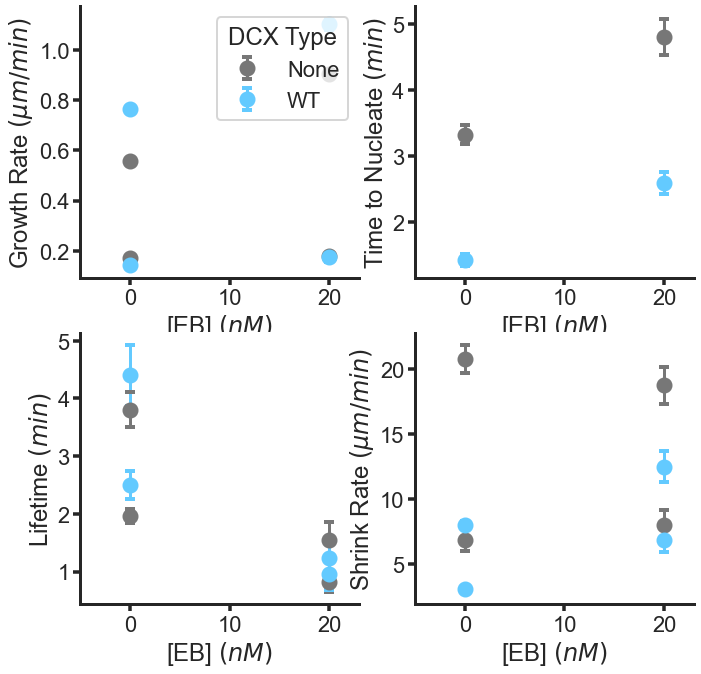

In [180]:
scattersize = 12
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(11,11))

count = 0
for dcxtype in ResultFit[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype)].dropna(subset=['Coefficient'])
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[EBconc].values
            y = parameterMeanDF['Fit'].values
            yerr = parameterMeanDF['SE'].values
            ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                                          markeredgewidth=4, alpha = 1 ,color=palette[count])

            c += 1

    count += 1

# ax[0][0].set_ylim(0,1)
# ax[1][0].set_ylim(0,18)
# ax[0][1].set_ylim(0,10)
# ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,23)
        ax[i][j].set_xlabel(EBconc)
        #ax[i][j].set_xticks(np.arange(0, 23, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')


#plt.savefig(path/('expansion_'+date_today+'.svg'))

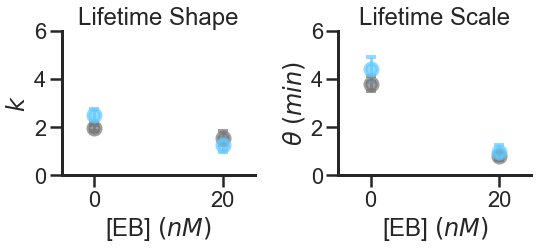

In [216]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,2,figsize=(8,4))
#     plt.suptitle('Fitted pooled data', fontsize=30)
selectcoeff = ResultFit.dropna(subset=['Coefficient'])

count = 0
for dcxtype in data[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Parameter']==Lifetime)
                           & (ResultFit[tubulin]==8)].dropna(subset=['Coefficient'])

    x = dcxtype_DF[(dcxtype_DF['Coefficient']==0)][EBconc].values
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['SE'].values

    ax[0].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4, alpha = 0.7, elinewidth=3,color=palette[count])
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['SE'].values

    ax[1].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,alpha = 0.7,elinewidth=3,color=palette[count])
    
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].set_ylim(0,6)
    ax[i].set_xlim(-5,25)
    ax[i].set_xlabel(EBconc)
    ax[i].set_xticks(np.arange(0, 25, 20))

ax[0].set_title('Lifetime Shape')
ax[0].set_ylabel( r'$k$')

ax[1].set_title('Lifetime Scale')
ax[1].set_ylabel( r'$\theta \; (min)$')


# ax[0].legend((Type_order),loc='upper right',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_lifetimeparms.svg'))